#### 线性分类器

### 1.定义一个评分函数（score function）
这个函数将图像的像素值映射为各个分类类别的得分，得分高低代表图像属于该类别的可能性高低。从图像到标签分值的参数化映射


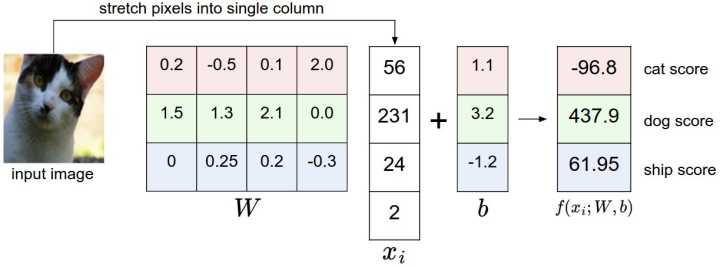

我们看到例子中权重值非常差，因为猫分类的得分非常低（-96.8），而狗（437.9）和船（61.95）比较高。我们将使用损失函数（Loss Function）（有时也叫代价函数Cost Function或目标函数Objective）来衡量我们对结果的不满意程度。直观地讲，当评分函数输出结果与真实结果之间差异越大，损失函数输出越大，反之越小。

### 2.多类支持向量机损失 Multiclass Support Vector Machine Loss

折叶损失（hinge loss）：
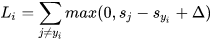

怎么理解这个函数呢？举个栗子！
y_{i}表示正确分类，s_{y_{i}}是其得分。将其与不正确分类进行比较，不正确分类的score 当然越小越好了。当且仅当不正确分类的score比正确分类的score小，且差值小于Delta时，其对损失函数的值没有影响。不正确分类的score大于正确分类的score,或者比它小，但小的不是很多，即Delta，都会增大损失函数的值。
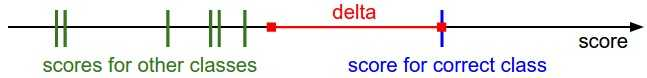
delta超参数，通常设为1.


平方折页损失（square hinge loss）:
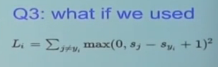
将更强烈（平方地而不是线性地）地惩罚过界的边界值。不使用平方是更标准的版本，但是在某些数据集中，平方折叶损失会工作得更好。可以通过交叉验证来决定到底使用哪个。

### 3.正则化惩罚（regularization penalty）

为什么要加入正则化惩罚项？why？

1.假设存在一个W能够正确分类每个数据，但这个W并不唯一：可能有很多相似的W都能正确地分类所有的数据。比一个简单的例子：如果W能够正确分类所有数据，即对于每个数据，损失值都是0。那么当\lambda>1时，任何数乘\lambda W都能使得损失值为0。因此，加入正则化惩罚项，最常用的正则化惩罚是L2范式，L2范式通过对所有参数进行逐元素的平方惩罚来抑制大数值的权重。

2.对大数值权重进行惩罚，可以提升其泛化能力，因为这就意味着没有哪个维度能够独自对于整体分值有过大的影响。鼓励分类器最终将所有维度上的特征都用起来，而不是强烈依赖其中少数几个维度。在后面的课程中可以看到，这一效果将会提升分类器的泛化能力，并避免过拟合。

3.需要注意的是，和权重不同，偏差没有这样的效果，因为它们并不控制输入维度上的影响强度，就是说偏差不会影响输入X。因此通常只对权重W正则化，而不正则化偏差b。
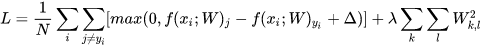

### 4.softmax classifier（multinomial logistic regression）

交叉熵损失（cross-entropy loss)
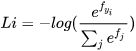


这门课给出的解释是这样：
以自然数为底的指数，然后归一化概率，正确分类的得分所占概率越大越好。
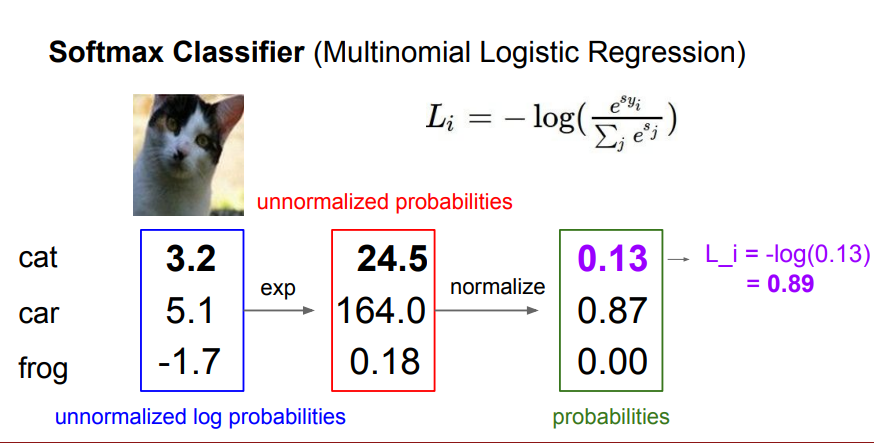

从信息论的角度来看：

1.信息量：一个事件的发生的概率的负对数,概率越大，其传递的信息量也就越少。
即log(1/p)

2.信息熵（entropy）：香农信息量的期望。假设事件X是随机离散变量。其概率分布为p。则事件X的信息熵为H(p):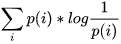

3.交叉熵：现有关于样本集的2个概率分布p和q，其中p为真实分布，q非真实分布。如果使用错误分布q来表示来自真实分布p的平均编码长度，则应该是H(p,q)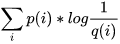

H(p,q)>=H(p)恒成立，当q为真实分布的时候取等号;当两个分布越接近时，交叉熵越小。

编程实现softmax函数计算的时候，中间项e^{f_{y_i}}和\sum_j e^{f_j}因为存在指数函数，所以数值可能非常大。
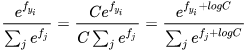

通常取

### 5. 最优化 Optimization